## IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

## IMPORTING AND ANALYSIS THE DATASET

In [2]:
db1 = pd.read_csv('exercise.csv')
db2 = pd.read_csv('calories.csv')

In [3]:
print(db1.head())
print()
print(db2.head())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0


In [4]:
dataset = pd.merge(db1, db2, on='User_ID')
print(dataset.head())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  


In [5]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
None


In [6]:
dataset.isnull().sum()                                  #early info of the dataset

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

## DATASET MODIFICATION

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


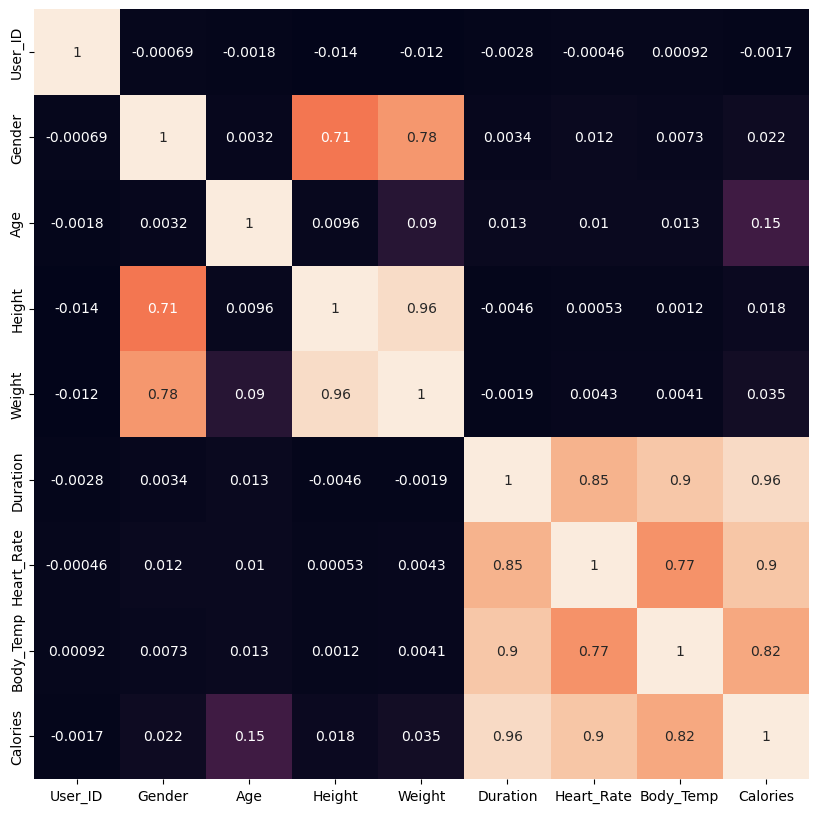

In [8]:
plt.figure(figsize=(10, 10))
sb.heatmap(dataset.corr(), annot=True, cbar=False)      #to check if any columns are related
plt.show()

In [9]:
# dataset = dataset.drop('Height', axis=1)      #dropping column that is to be deleted
dataset = dataset.drop('User_ID', axis=1)
dataset.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


## SPLITTING TRAINING SET AND TEST SET

In [10]:
features = dataset.drop(['Calories'], axis=1)
target = dataset['Calories']

print(features)
print(target)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 1)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12000, 7)
(12000,)
(3000, 7)
(3000,)


# TRAINING MODEL

### Linear Regression

In [13]:
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

### Polynomial Regression

In [14]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import make_pipeline

# regressor = make_pipeline(PolynomialFeatures(4), LinearRegression())
# regressor.fit(X_train, y_train)

### Decision Tree

In [15]:
# from sklearn.tree import DecisionTreeRegressor
# regressor = DecisionTreeRegressor(random_state = 0)
# regressor.fit(X_train, y_train)

### Random Forest

In [16]:
# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
# regressor.fit(X_train, y_train)

### XGBOOST

In [17]:
# from xgboost import XGBRegressor
# regressor = XGBRegressor()
# regressor.fit(X_train, y_train)

## PREDICTING TEST SET

In [18]:
y_pred = regressor.predict(X_test)

NameError: name 'regressor' is not defined

In [ ]:
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
results = list(zip(y_pred, y_test))
for item in results:
    print(item)

In [ ]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print(f"Efficiency (R-SQUARED): {r_squared*100}%")

## PREDICTING SINGLE VALUE

In [ ]:
gender = 1  #int(input("Male(1) / Female(0): ")) 
age = 68    #int(input("Enter age: "))
height = 190   #int(input("Enter height: "))
weight = 94   #int(input("Enter weight: "))
duration = 29    #int(input("Enter duration of exercise: "))
heart_rate = 105  #int(input("Enter heart rate: "))
temp = 40.8        #int(input("Enter body tempertaure: "))
print()

result = regressor.predict([[gender,age,height,weight,duration,heart_rate,temp]])[0]
print(f"Calories Burnt: {result}")  #231.0

## REPORT

### Linear Regression:  96.55977245826503%

### Ploynomial Regression: 99.99785197556562%

### Decision Trees: 99.2607332777281%

### Random Forest: 99.71552668828195%

### XGBOOST: 99.86863132331905%

# OPTIMAL MODELS:


### XGBOOST

### Random Forest